In [1]:
### This script is to evaluate the model performance when tweaking it or the dataset

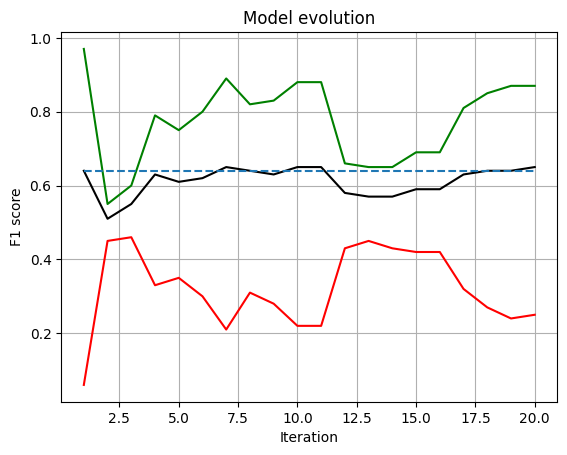

In [2]:
import matplotlib.pyplot as plt

# x axis will be different iterations of the model
# y axis will be F1 score

x = [i for i in range(1,21)] # iterations
F1_score = [0.64, 0.51, 0.55, 0.63, 0.61, 0.62, 0.65, 0.64, 0.63, 0.65, 0.65, 0.58, 0.57, 0.57, 0.59, 0.59, 0.63, 0.64, 0.64, 0.65]
F1_score_on_expected_class = [0.97, 0.55, 0.60, 0.79, 0.75, 0.80, 0.89, 0.82, 0.83, 0.88, 0.88, 0.66, 0.65, 0.65, 0.69, 0.69, 0.81, 0.85, 0.87, 0.87]
F1_score_on_upset_class = [0.06, 0.45, 0.46, 0.33, 0.35, 0.30, 0.21, 0.31, 0.28, 0.22, 0.22, 0.43, 0.45, 0.43, 0.42, 0.42, 0.32, 0.27, 0.24, 0.25]

# 1. Iteration: Only rank_features --> TOP FEATURES: rank_diff, p1/p2 rank
# 2. Iteration: Only h2h_features --> TOP FEATURES: p1/p2 h2h wins, h2h_matches
# 3. Iteration: (h2h_features + age_features) = static without rank --> TOP FEATURES: p1/p2 h2h wins, h2h_matches, age_diff, p1/p2 ages

# 4. Iteration: static without rank + serve_features --> TOP FEATURES: diff_2nd_serve_win_pc_360d, diff_1st_serve_win_pc_90d, diff_1st_serve_win_pc_180d, diff_2nd_serve_win_pc_180d, diff_2nd_serve_win_pc_90d	
# 5. Iteration: static without rank + return_features --> TOP FEATURES: diff_return_win_pc_90d, diff_return_win_pc_180d, diff_return_win_pc_360d, p2_h2h_wins, p1_h2h_wins
# 6. Iteration: static without rank + pressure_features --> TOP FEATURES: diff_tiebreak_win_pc_360d, diff_tiebreak_win_pc_180d, diff_tiebreak_win_pc_90d, p1_h2h_wins, p2_h2h_wins
# 7. Iteration: static without rank + outcome_features --> TOP FEATURES: diff_win_pc_360d, diff_win_pc_180d, diff_win_pc_90d, diff_matches_played_360d, diff_matches_played_180d
# 8. Iteration: static without rank + serve_features + return_features --> TOP FEATURES: diff_2nd_serve_win_pc_360d, diff_return_win_pc_90d, diff_return_win_pc_360d, diff_1st_serve_win_pc_90d, diff_1st_serve_win_pc_180d
# 9. Iteration: static without rank + serve_features + return_features + pressure_features --> TOP FEATURES: diff_2nd_serve_win_pc_360d, diff_return_win_pc_90d, diff_tiebreak_win_pc_360d, diff_1st_serve_win_pc_180d, diff_1st_serve_win_pc_360d	
# 10. Iteration: static without rank + serve_features + return_features + outcome_features --> TOP FEATURES: diff_win_pc_360d, diff_win_pc_180d, diff_matches_played_360d, diff_win_pc_90d, diff_matches_played_180d, diff_2nd_serve_win_pc_360d
# 11. Iteration: static without rank + general_dynamic_features --> TOP FEATURES: diff_win_pc_360d, diff_win_pc_90d, diff_win_pc_180d, diff_matches_played_360d, diff_1st_serve_win_pc_180d, diff_2nd_serve_win_pc_360d	
# 12. Iteration: static with rank + general_dynamic_features --> TOP FEATURES: rank_diff, diff_win_pc_360d, diff_win_pc_90d, diff_win_pc_180d, diff_matches_played_180d, diff_2nd_serve_win_pc_360d

# 13. Iteration: static without rank + surface_serve_features --> TOP FEATURES: diff_2nd_serve_win_pc_surface_360d, diff_1st_serve_win_pc_surface_360d, diff_2nd_serve_win_pc_surface_180d, diff_1st_serve_win_pc_surface_180d, diff_1st_serve_win_pc_surface_90d
# 14. Iteration: static without rank + surface_return_features --> TOP FEATURES: diff_return_win_pc_surface_360d, diff_return_win_pc_surface_180d, diff_return_win_pc_surface_90d, p2_h2h_wins, p1_h2h_wins
# 15. Iteration: static without rank + surface_pressure_features --> TOP FEATURES: diff_tiebreak_win_pc_surface_360d, diff_tiebreak_win_pc_surface_180d, p2_h2h_wins, p1_h2h_wins, diff_tiebreak_win_pc_surface_90d
# 16. Iteration: static without rank + surface_outcome_features --> TOP FEATURES: diff_win_pc_surface_360d, diff_win_pc_surface_180d, diff_matches_played_surface_360d, p2_win_pc_surface_360d
# 17. Iteration: static without rank + general_dynamic_surface_features --> TOP FEATURES: diff_win_pc_surface_360d, diff_win_pc_surface_180d, diff_matches_played_surface_360d, p1_win_pc_surface_360d, p2_win_pc_surface_360d

# 18. Iteration: static without rank + general_dynamic_surface_features + general_dynamic_features over only 90 days --> TOP FEATURES: diff_win_pc_90d, diff_matches_played_90d, diff_2nd_serve_win_pc_90d, diff_1st_serve_win_pc_90d, diff_return_win_pc_90d
# 19. Iteration: static without rank + general_dynamic_surface_features + general_dynamic_features over only 180 days --> TOP FEATURES: diff_win_pc_180d, diff_matches_played_180d, diff_win_pc_surface_180d, diff_1st_serve_win_pc_180d, diff_2nd_serve_win_pc_180d
# 20. Iteration: static without rank + general_dynamic_surface_features + general_dynamic_features over only 360 days --> TOP FEATURES: diff_win_pc_360d, diff_win_pc_surface_360d, diff_matches_played_360d, diff_2nd_serve_win_pc_360d, diff_matches_played_surface_360d

# 21. Iteration: static without rank + general_dynamic_surface_features + general_dynamic_features over all time windows --> TOP FEATURES: diff_win_pc_360d, diff_win_pc_90d, diff_win_pc_180d, diff_matches_played_360d, diff_2nd_serve_win_pc_360d, diff_win_pc_surface_360d

plt.plot(x,F1_score, color = 'black', label = 'F1 Score on whole test set')
plt.plot(x,F1_score_on_expected_class, color = 'green', label = 'F1 Score on test set with expected outcome')
plt.plot(x,F1_score_on_upset_class, color='red', label = 'F1 Score on test set with upset outcome')
plt.hlines(y=0.64, xmin=min(x), xmax =max(x),linestyles = 'dashed', label = 'baseline')
plt.title('Model evolution')
plt.xlabel('Iteration')
plt.ylabel('F1 score')
plt.grid(True)
plt.show()

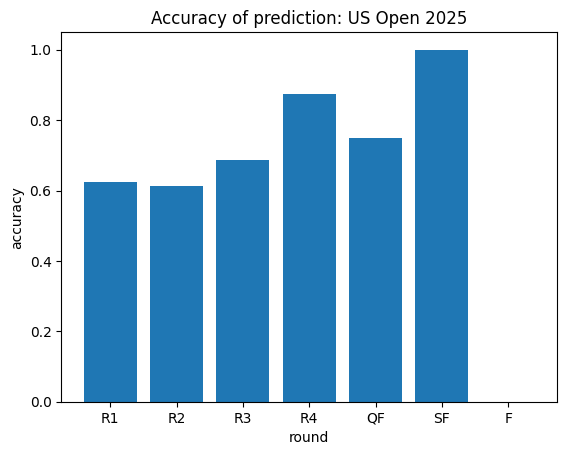

In [6]:
### Evaluate performance at US Open 2025

# Accuracies per round:
accuracy = [0.625, 0.613, 0.687, 0.875, 0.75, 1,0]
round = ['R1', 'R2', 'R3', 'R4', 'QF', 'SF', 'F']
plt.title('Accuracy of prediction: US Open 2025')
plt.bar(round,accuracy)
plt.xlabel('round')
plt.ylabel('accuracy')
plt.show()

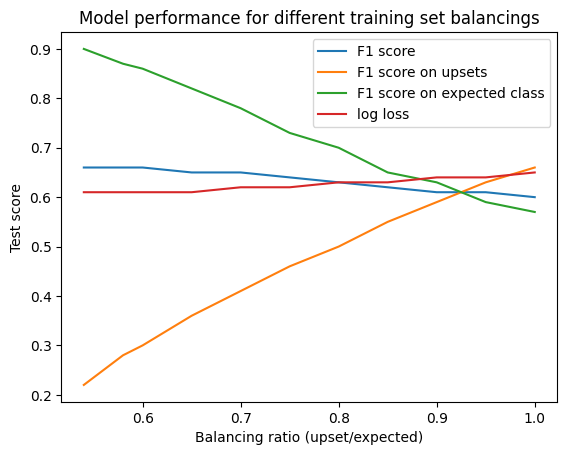

In [8]:
### Evaluate model performance for different ratios of upsets/expected in trainingdata

ratio = [0.54, 0.58, 0.60, 0.65, 0.70, 0.75, 0.8, 0.85, 0.9, 0.95,1]
F1_score = [0.66, 0.66, 0.66, 0.65, 0.65, 0.64, 0.63, 0.62, 0.61, 0.61, 0.6]
F1_score_upsets = [0.22, 0.28, 0.30, 0.36, 0.41, 0.46, 0.5, 0.55, 0.59, 0.63, 0.66]
F1_score_expected = [0.90, 0.87, 0.86, 0.82, 0.78, 0.73, 0.7, 0.65, 0.63, 0.59, 0.57]
log_loss = [0.61, 0.61, 0.61, 0.61, 0.62, 0.62, 0.63, 0.63, 0.64, 0.64, 0.65]

plt.plot(ratio, F1_score, label = 'F1 score')
plt.plot(ratio, F1_score_upsets, label = 'F1 score on upsets')
plt.plot(ratio, F1_score_expected, label = 'F1 score on expected class')
plt.plot(ratio, log_loss, label='log loss')
plt.xlabel('Balancing ratio (upset/expected)')
plt.ylabel('Test score')
plt.legend()
plt.title('Model performance for different training set balancings')
plt.show()